## Testing Battery Adaptation Algorithm

In [1]:
import numpy as np
import pandas as pd
import src.online_learning.adaptation_utils.adaptation_due as adaptation
import notebooks.online_learning.utils.plotting_utils as plot
import notebooks.online_learning.utils.data_generation_utils as gnt
import notebooks.online_learning.utils.loading_utils as load
import os

In [ ]:
nominal_cluster_file_path = "data/artificial/nominal_cluster.csv"
outliers_file_path = "data/artificial/outliers.csv"

## Artificial Multivariate Gaussian, representative of the nominal cluster( for a cell)

In [2]:
current_directory = os.getcwd()
print(current_directory)

/mnt/c/Users/Nicola_Petkovic/Documents/dt-rse-new/DT-rse/notebooks/online_learning


In [3]:
df = load.csv_as_df(file_path=nominal_cluster_file_path)
samples = df.to_numpy()

In [4]:
df.describe()

,r0,rc,c
count,100.000000,100.000000,100.000000
mean,0.750704,0.577736,8074.234495
std,0.915212,1.289762,0.717613
min,-1.276179,-2.158868,8072.673456
25%,0.070971,-0.266138,8073.765155
50%,0.679051,0.491384,8074.207506
75%,1.353802,1.430726,8074.657644
max,3.147951,3.935432,8076.010840


In [5]:
df.head()

,r0,rc,c
0,-0.327479,-1.485506,8073.300330
1,1.287187,1.363845,8074.464434
2,1.418608,2.488245,8076.010840
3,1.365107,1.728898,8075.079138
4,-0.219909,-0.934295,8073.417692


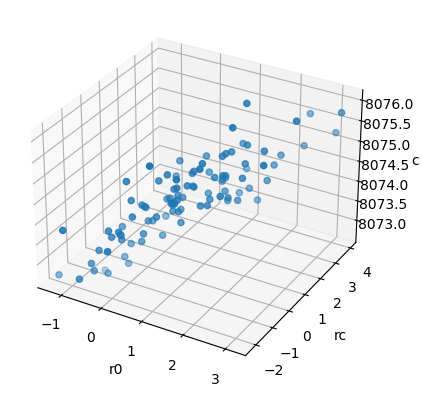

In [6]:
plot.threed_scatter(df)

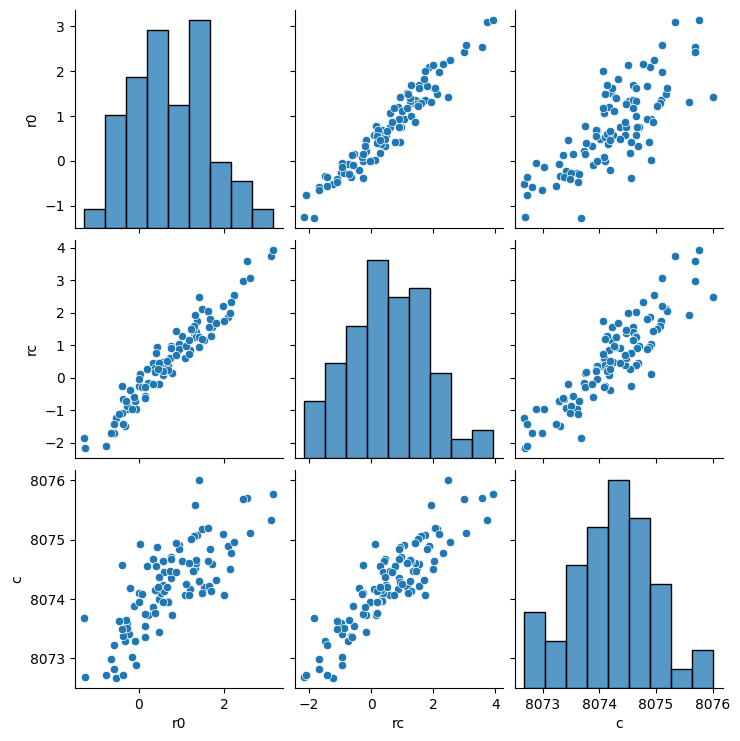

In [7]:
plot.pairwise_scatter(df)

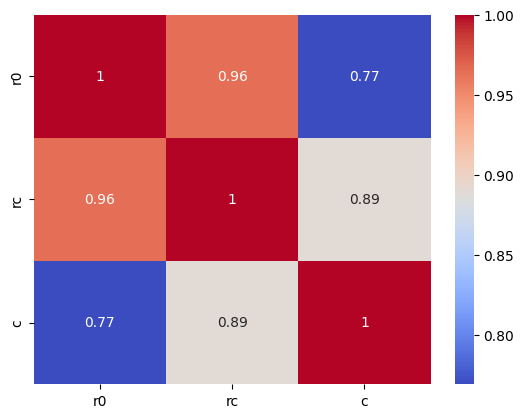

In [8]:
plot.correlation_heatmap(df)

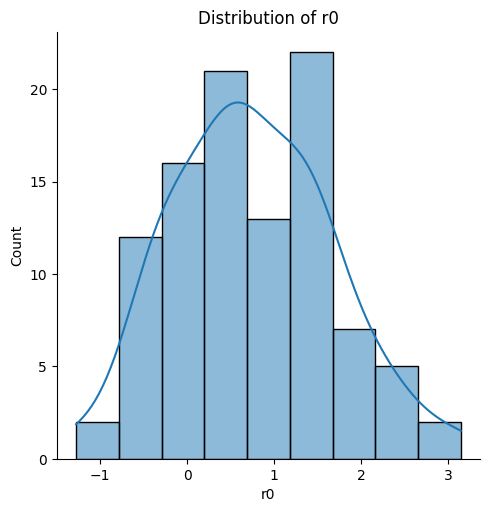

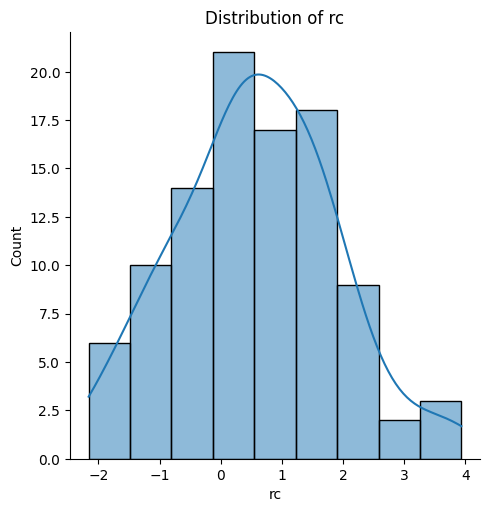

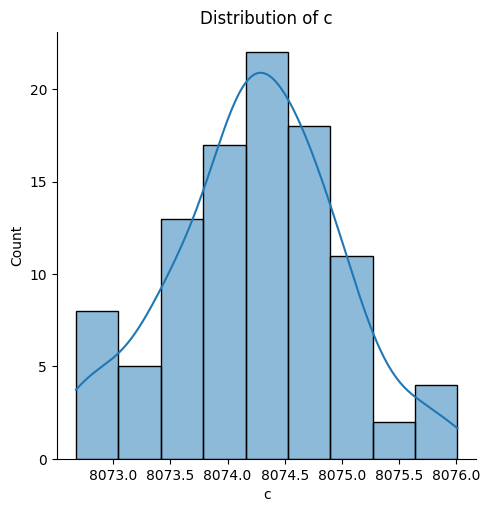

In [9]:
plot.marginal_distributions(df)

## Generate an array of outliers 

In [10]:
df_outliers = load.csv_as_df(outliers_file_path)
outliers = df_outliers.to_numpy()

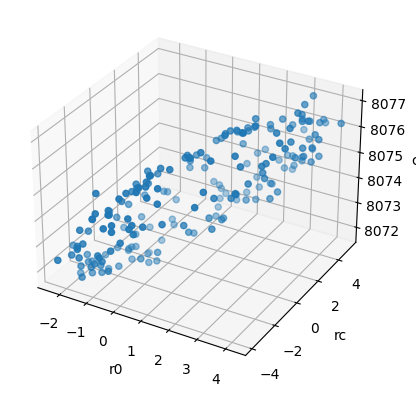

In [11]:
plot.threed_scatter(df_outliers)

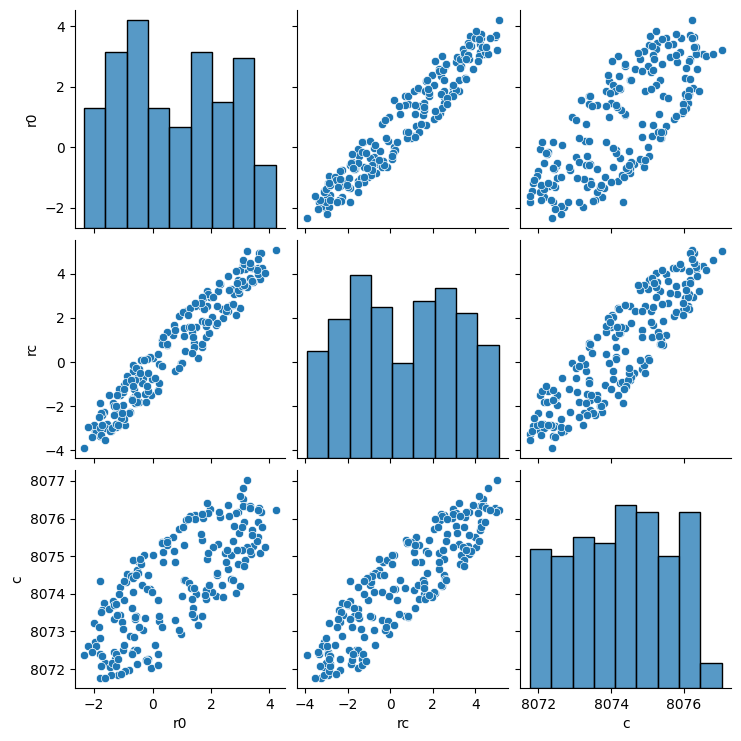

In [12]:
plot.pairwise_scatter(df_outliers)

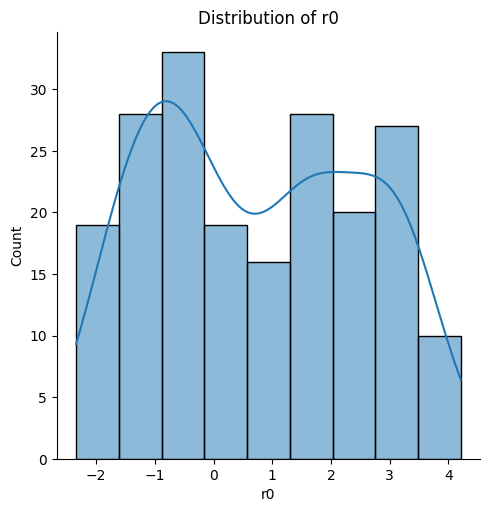

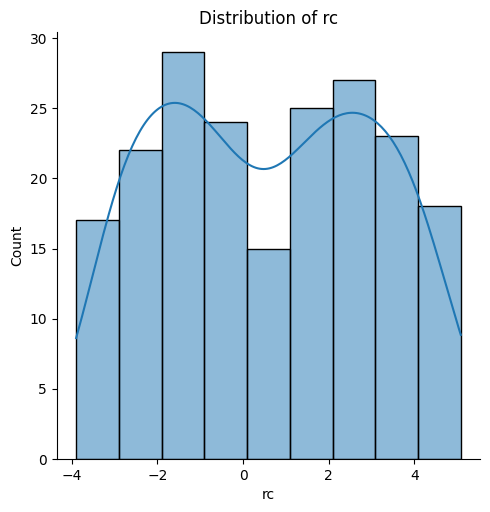

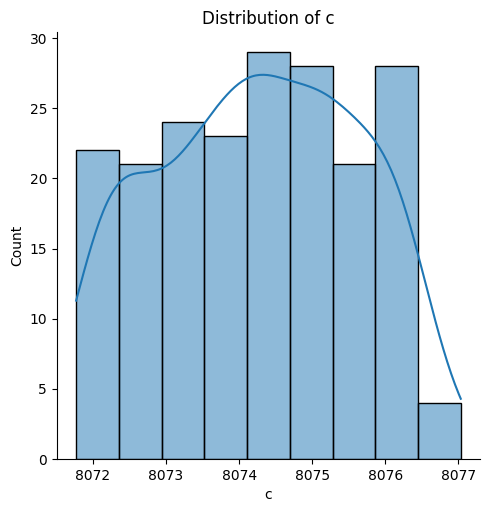

In [13]:
plot.marginal_distributions(df_outliers)

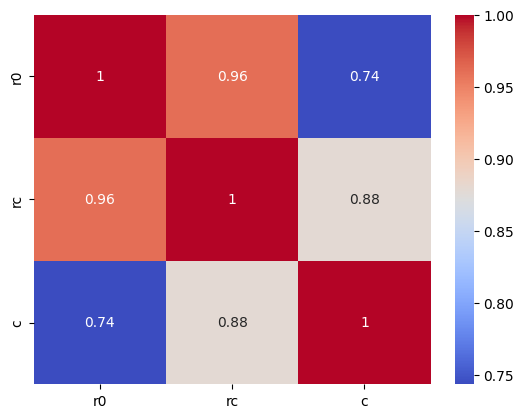

In [14]:
plot.correlation_heatmap(df_outliers)

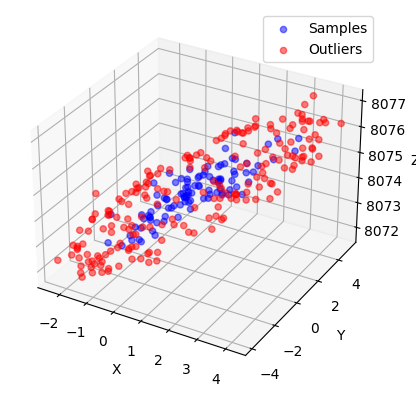

In [15]:
plot.samples_and_outliers(samples=samples,outliers=outliers)

## Faulty cluster  creation

In [16]:
phi = adaptation.fault_cluster_creation( cluster_points=samples, outliers=outliers)

ks_value 0.15333333333333332 p_value 0.00015495631169276644
Reject the null hypothesis: f_hat and f_tau are different. Create a new cluster.
[[ 9.34184896e-01  5.94164514e-01  8.07440222e+03]
 [ 9.34184896e-01  5.94164514e-01  8.07440222e+03]
 [ 9.34184896e-01  5.94164514e-01  8.07440222e+03]
 [ 9.34184896e-01  5.94164514e-01  8.07440222e+03]
 [ 9.34184896e-01  5.94164514e-01  8.07440222e+03]
 [ 9.34184896e-01  5.94164514e-01  8.07440222e+03]
 [ 9.34184896e-01  5.94164514e-01  8.07440222e+03]
 [ 9.34184896e-01  5.94164514e-01  8.07440222e+03]
 [ 9.34184896e-01  5.94164514e-01  8.07440222e+03]
 [ 9.34184896e-01  5.94164514e-01  8.07440222e+03]
 [ 9.34184896e-01  5.94164514e-01  8.07440222e+03]
 [ 9.34184896e-01  5.94164514e-01  8.07440222e+03]
 [ 9.34184896e-01  5.94164514e-01  8.07440222e+03]
 [ 9.34184896e-01  5.94164514e-01  8.07440222e+03]
 [-2.34170054e+00 -3.89887461e+00  8.07176977e+03]
 [ 9.34184896e-01  5.94164514e-01  8.07440222e+03]
 [-2.34170054e+00 -3.89887461e+00  8.071769

In [17]:
phi_data_points = np.array(phi.get_parameters())
df_faulty = pd.DataFrame(phi_data_points, columns=['r0','rc','c'])

In [25]:
df_faulty.describe()

,r0,rc,c
count,60.000000,60.000000,60.000000
mean,0.792544,0.719848,8074.391783
std,0.959823,1.023274,0.638893
min,-0.680761,-1.467396,8073.183187
25%,-0.104308,-0.060567,8073.971432
50%,0.759173,0.824497,8074.321861
75%,1.656028,1.532045,8074.899505
max,2.400716,2.685670,8075.576431


In [18]:
df_faulty.head()

,r0,rc,c
0,0.713886,1.203326,8075.512286
1,-0.549283,-0.502236,8074.639743
2,1.921717,1.326033,8074.243135
3,1.701335,0.676609,8073.405137
4,-0.470289,-0.335935,8074.856479


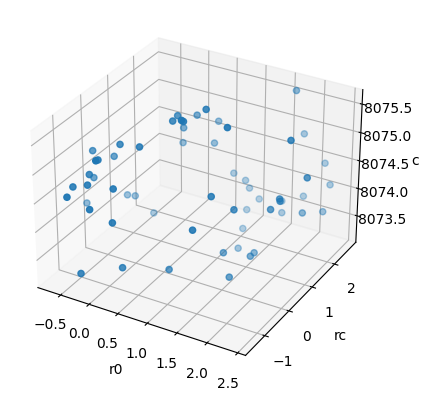

In [19]:
plot.threed_scatter(df_faulty)

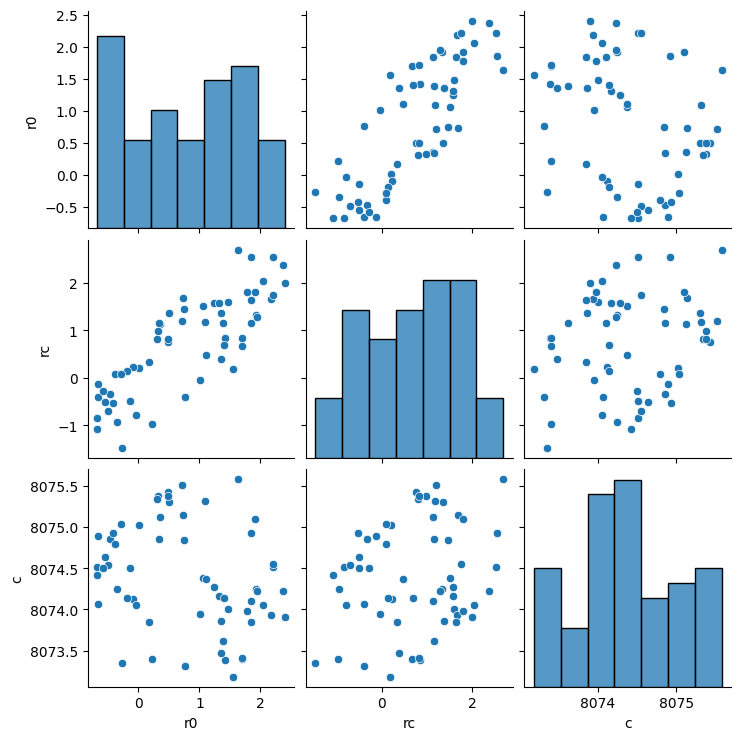

In [20]:
plot.pairwise_scatter(df_faulty)

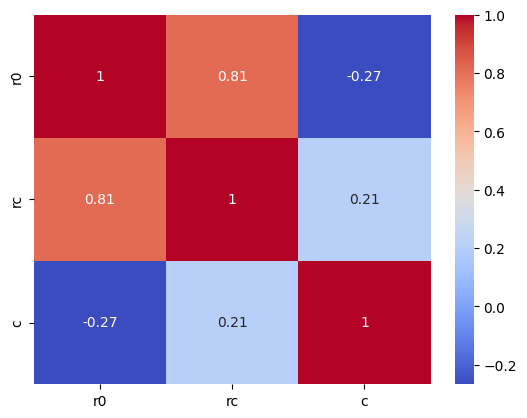

In [21]:
plot.correlation_heatmap(df_faulty)

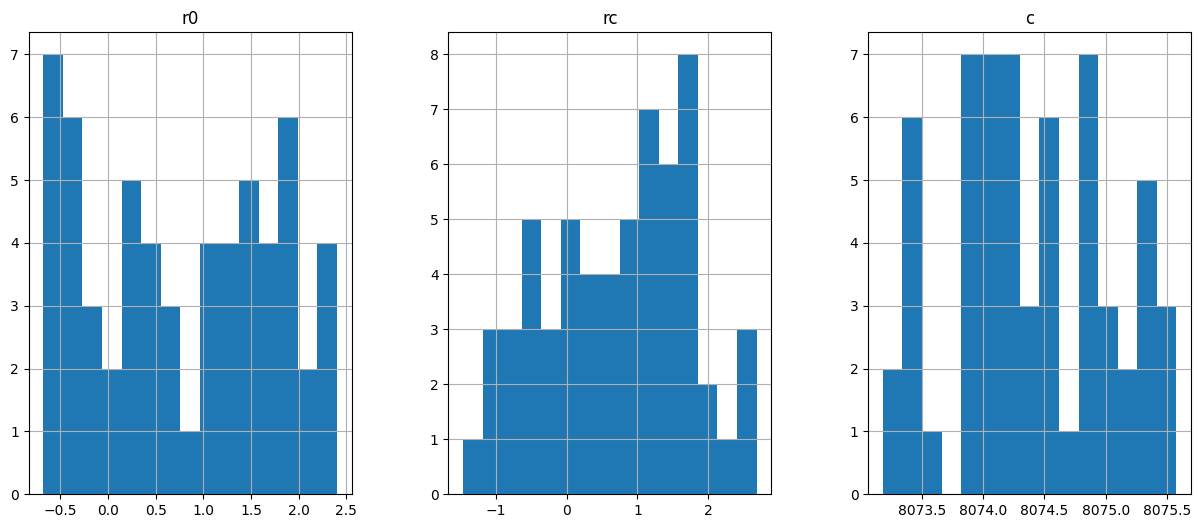

In [22]:
plot.histograms(df_faulty)

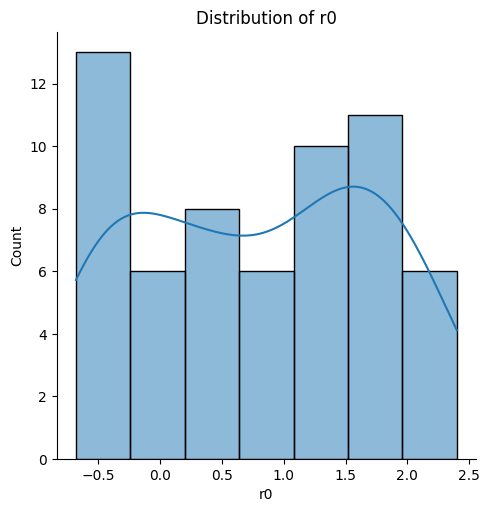

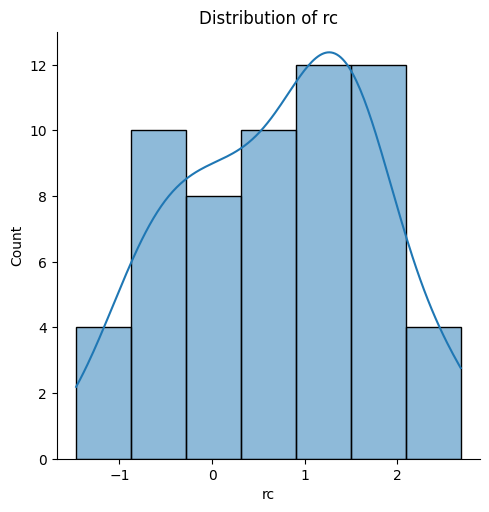

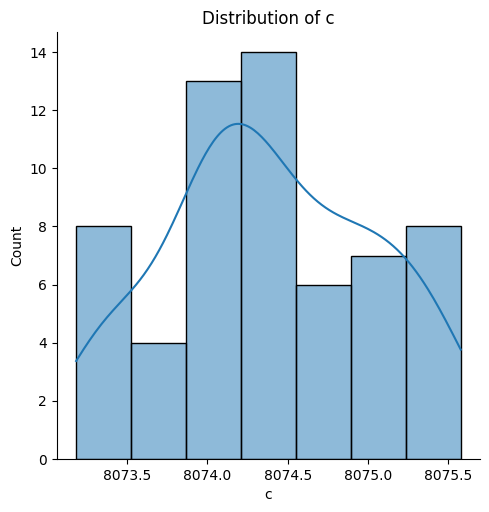

In [23]:
plot.marginal_distributions(df_faulty)

Nominal cluster compared to the faulty 

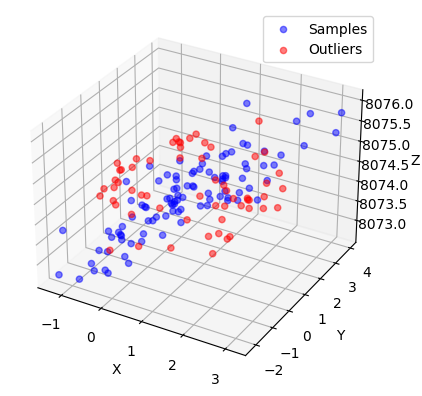

In [24]:
plot.samples_and_outliers(samples=samples,outliers=phi_data_points)